## Connect jupyter to postgres database : 

In [9]:
import pandas as pd
import psycopg2
from dotenv import load_dotenv
import os

# Load .env from current directory
load_dotenv('.env')

# Read env variables (use defaults or None if missing)
PG_USER = os.getenv('PG_USER')
PG_PASSWORD = os.getenv('PG_PASSWORD')
PG_HOST = os.getenv('PG_HOST', 'localhost')
PG_PORT = os.getenv('PG_PORT', '5432')
PG_DB = os.getenv('PG_DB')


try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(
        dbname=PG_DB,
        user=PG_USER,
        password=PG_PASSWORD,
        host=PG_HOST,
        port=PG_PORT
    )

    # Example: load energy_consumption_hourly
    data = pd.read_sql('SELECT * FROM energy_consumption_hourly', conn)
    
    # Create a cursor to execute SQL
    cur = conn.cursor()
    
    # Run a simple query to test connection
    cur.execute("SELECT version();")
    version = cur.fetchone()
    print("Connection successful! PostgreSQL version:", version[0])
    
    # Close cursor and connection
    cur.close()
    conn.close()
    
except Exception as e:
    print("Connection failed:", e)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31152\790026072.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql('SELECT * FROM energy_consumption_hourly', conn)


Connection successful! PostgreSQL version: PostgreSQL 16.10 (Debian 16.10-1.pgdg13+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 14.2.0-19) 14.2.0, 64-bit


- 210240 rows × 21 columns

In [10]:
data

,time_ts,building,winter_flag,spring_flag,summer_flag,fall_flag,outdoor_temp_c,humidity_pct,cloud_cover_pct,solar_radiation_w_m2,...,day_of_week,month_num,day_of_year,is_weekend,is_holiday,is_peak_hour,lighting_kw,hvac_kw,special_equipment_kw,use_kw
0,2023-01-01 00:00:00,Hospital,1,0,0,0,-10.00,90.36,42.76,0.0,...,6,1,1,1,1,0,1.7337,2.9853,6.0873,10.8217
1,2023-01-01 01:00:00,Hospital,1,0,0,0,-10.00,90.90,50.11,0.0,...,6,1,1,1,1,0,1.6887,3.5390,6.3083,11.2541
2,2023-01-01 02:00:00,Hospital,1,0,0,0,-10.00,90.71,38.84,0.0,...,6,1,1,1,1,0,1.7212,3.6485,5.9951,11.4253
3,2023-01-01 03:00:00,Hospital,1,0,0,0,-9.81,90.44,34.33,0.0,...,6,1,1,1,1,0,1.6233,4.4524,6.0594,11.9859
4,2023-01-01 04:00:00,Hospital,1,0,0,0,-8.27,88.83,24.28,0.0,...,6,1,1,1,1,0,1.6414,4.9425,6.4094,12.8251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2023-12-31 19:00:00,School,0,0,0,1,-9.86,91.83,17.57,0.0,...,6,12,365,1,1,1,0.2982,0.7246,1.8321,2.8872
210236,2023-12-31 20:00:00,School,0,0,0,1,-10.00,92.50,21.40,0.0,...,6,12,365,1,1,1,0.3055,0.6957,1.8719,2.9080
210237,2023-12-31 21:00:00,School,0,0,0,1,-10.00,92.80,19.89,0.0,...,6,12,365,1,1,0,0.3032,0.6749,1.8052,2.8309
210238,2023-12-31 22:00:00,School,0,0,0,1,-10.00,92.10,17.06,0.0,...,6,12,365,1,1,0,0.3050,0.7323,1.7872,2.7939


In [11]:
data.head()

,time_ts,building,winter_flag,spring_flag,summer_flag,fall_flag,outdoor_temp_c,humidity_pct,cloud_cover_pct,solar_radiation_w_m2,...,day_of_week,month_num,day_of_year,is_weekend,is_holiday,is_peak_hour,lighting_kw,hvac_kw,special_equipment_kw,use_kw
0,2023-01-01 00:00:00,Hospital,1,0,0,0,-10.00,90.36,42.76,0.0,...,6,1,1,1,1,0,1.7337,2.9853,6.0873,10.8217
1,2023-01-01 01:00:00,Hospital,1,0,0,0,-10.00,90.90,50.11,0.0,...,6,1,1,1,1,0,1.6887,3.5390,6.3083,11.2541
2,2023-01-01 02:00:00,Hospital,1,0,0,0,-10.00,90.71,38.84,0.0,...,6,1,1,1,1,0,1.7212,3.6485,5.9951,11.4253
3,2023-01-01 03:00:00,Hospital,1,0,0,0,-9.81,90.44,34.33,0.0,...,6,1,1,1,1,0,1.6233,4.4524,6.0594,11.9859
4,2023-01-01 04:00:00,Hospital,1,0,0,0,-8.27,88.83,24.28,0.0,...,6,1,1,1,1,0,1.6414,4.9425,6.4094,12.8251


In [14]:
for col in data.columns:
    print(f"{col}: {data[col].dtype}")

time_ts: datetime64[ns]
building: object
winter_flag: int64
spring_flag: int64
summer_flag: int64
fall_flag: int64
outdoor_temp_c: float64
humidity_pct: float64
cloud_cover_pct: float64
solar_radiation_w_m2: float64
hour_of_day: int64
day_of_week: int64
month_num: int64
day_of_year: int64
is_weekend: int64
is_holiday: int64
is_peak_hour: int64
lighting_kw: float64
hvac_kw: float64
special_equipment_kw: float64
use_kw: float64


# Data visualization : 

### 1. Time Series of Total Energy Consumption :

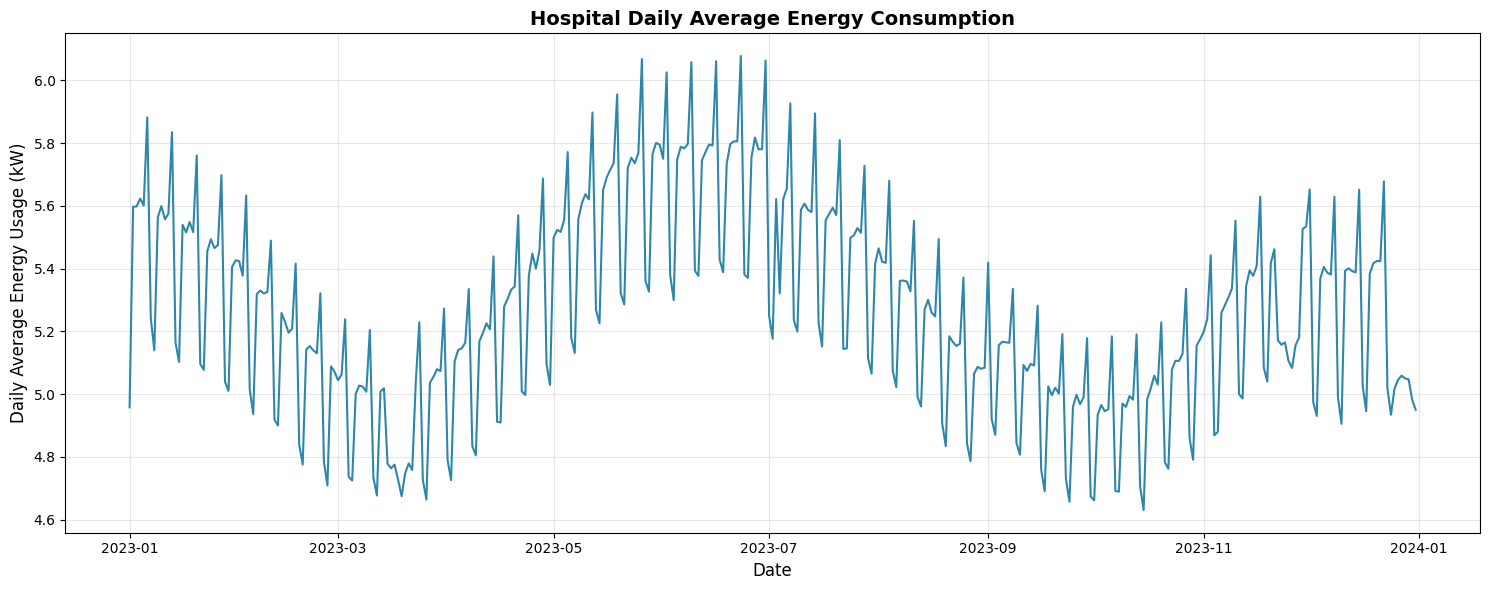

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and set as index
data['time_ts'] = pd.to_datetime(data['time_ts'])
df_plot = data.set_index('time_ts')

# Resample to daily averages
daily_avg = df_plot['use_kw'].resample('D').mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg.values, linewidth=1.5, color='#2E86AB')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Average Energy Usage (kW)', fontsize=12)
plt.title('Hospital Daily Average Energy Consumption', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Energy Breakdown by Category

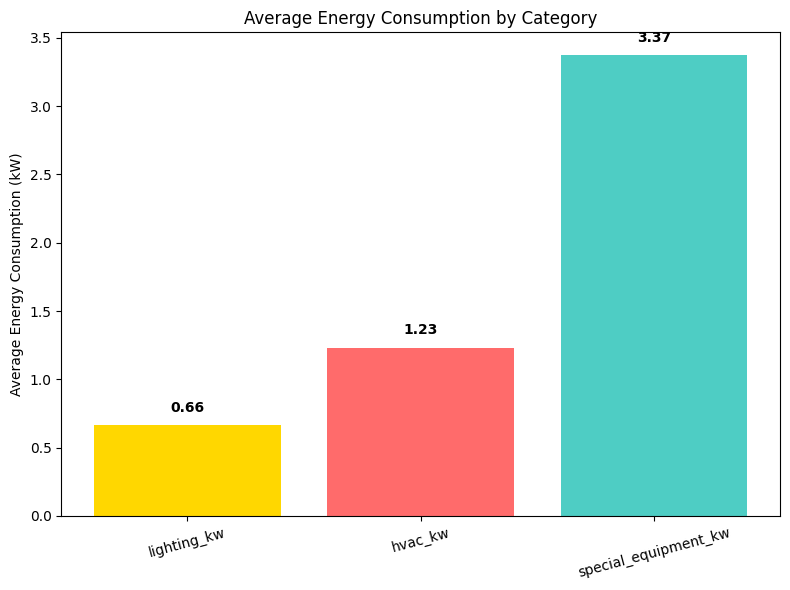

In [16]:
# Calculate average consumption by category
energy_categories = data[['lighting_kw', 'hvac_kw', 'special_equipment_kw']].mean()

plt.figure(figsize=(8, 6))
colors = ['#FFD700', '#FF6B6B', '#4ECDC4']
plt.bar(energy_categories.index, energy_categories.values, color=colors)
plt.ylabel('Average Energy Consumption (kW)')
plt.title('Average Energy Consumption by Category')
plt.xticks(rotation=15)
for i, v in enumerate(energy_categories.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Hourly Energy Pattern (24-hour cycle)

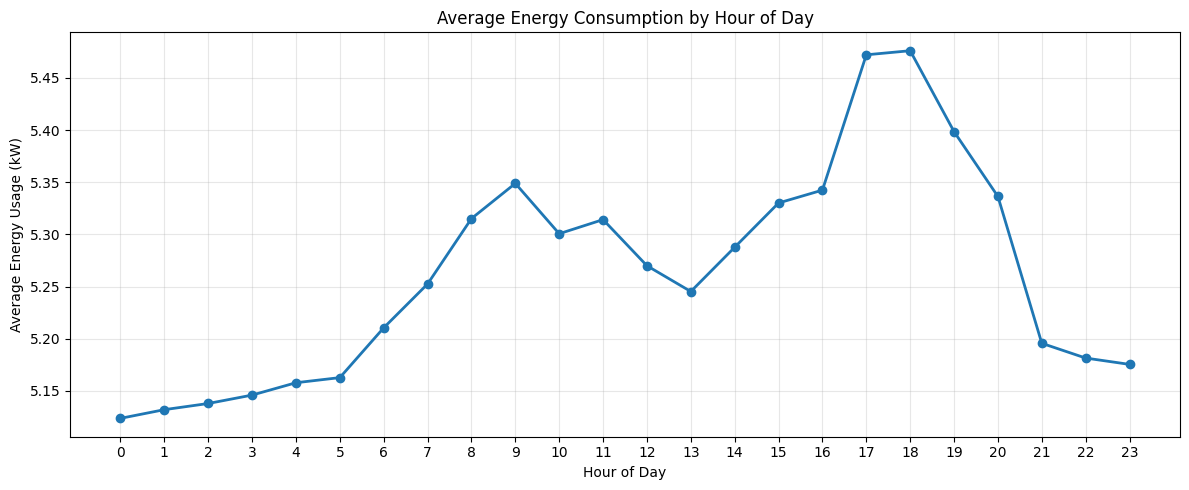

In [17]:
# Extract hour from timestamp
data['hour'] = pd.to_datetime(data['time_ts']).dt.hour

# Calculate average consumption by hour
hourly_avg = data.groupby('hour')['use_kw'].mean()

plt.figure(figsize=(12, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Usage (kW)')
plt.title('Average Energy Consumption by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Weekend vs Weekday Comparison

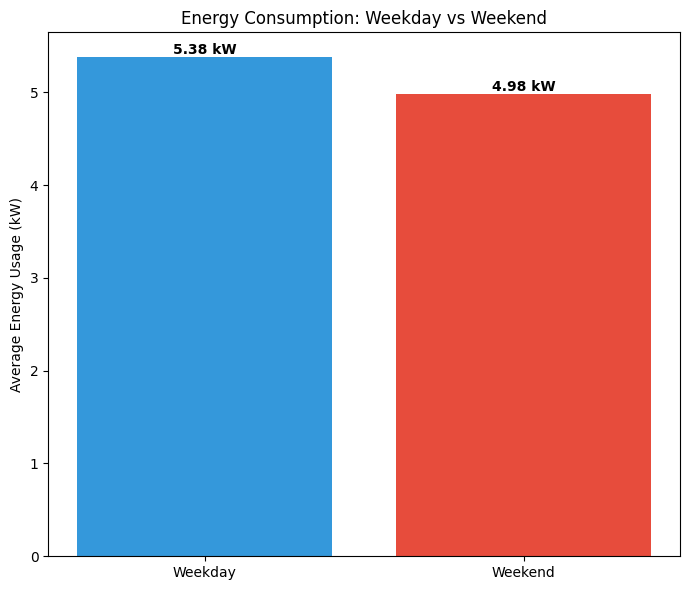

In [18]:
weekend_comparison = data.groupby('is_weekend')['use_kw'].mean()

plt.figure(figsize=(7, 6))
colors_wd = ['#3498db', '#e74c3c']
bars = plt.bar(['Weekday', 'Weekend'], weekend_comparison.values, color=colors_wd)
plt.ylabel('Average Energy Usage (kW)')
plt.title('Energy Consumption: Weekday vs Weekend')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} kW', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 5. Seasonal Energy Consumption

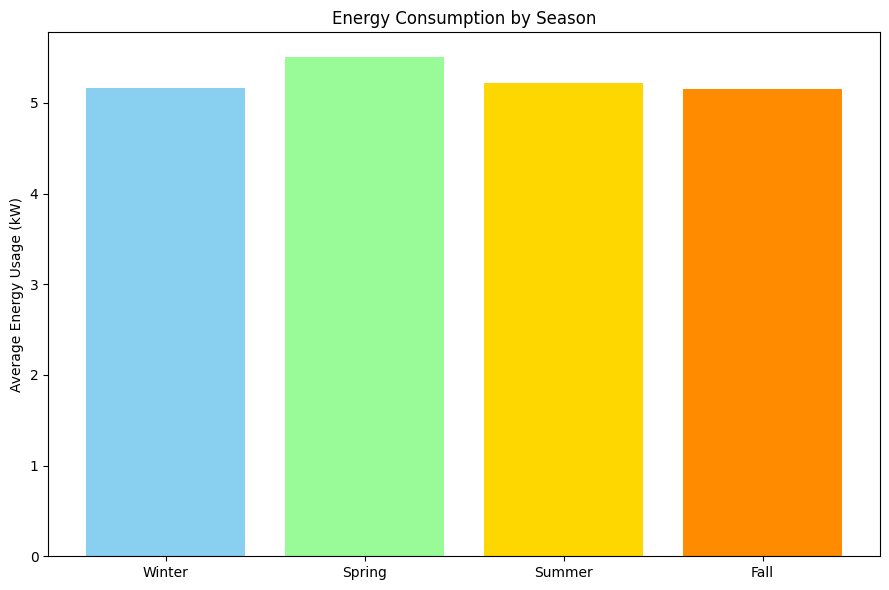

In [19]:
# Create season column
seasons = []
for _, row in data.iterrows():
    if row['winter_flag'] == 1:
        seasons.append('Winter')
    elif row['spring_flag'] == 1:
        seasons.append('Spring')
    elif row['summer_flag'] == 1:
        seasons.append('Summer')
    else:
        seasons.append('Fall')

data['season'] = seasons

seasonal_avg = data.groupby('season')['use_kw'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(9, 6))
colors_season = ['#89CFF0', '#98FB98', '#FFD700', '#FF8C00']
plt.bar(seasonal_avg.index, seasonal_avg.values, color=colors_season)
plt.ylabel('Average Energy Usage (kW)')
plt.title('Energy Consumption by Season')
plt.tight_layout()
plt.show()

### 6. Temperature vs Energy Correlation

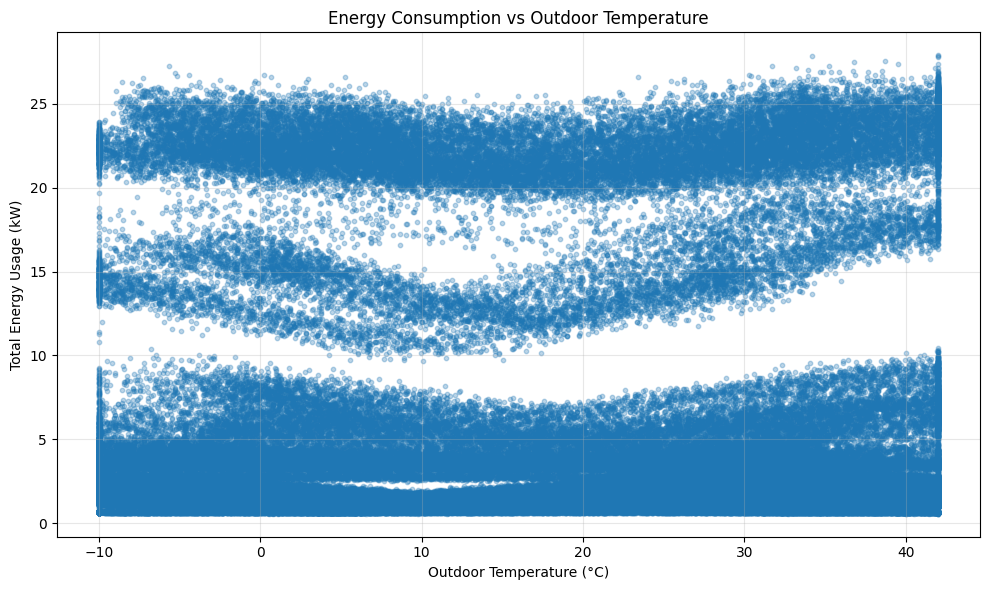

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['outdoor_temp_c'], data['use_kw'], alpha=0.3, s=10)
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Total Energy Usage (kW)')
plt.title('Energy Consumption vs Outdoor Temperature')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7. HVAC Load vs Temperature

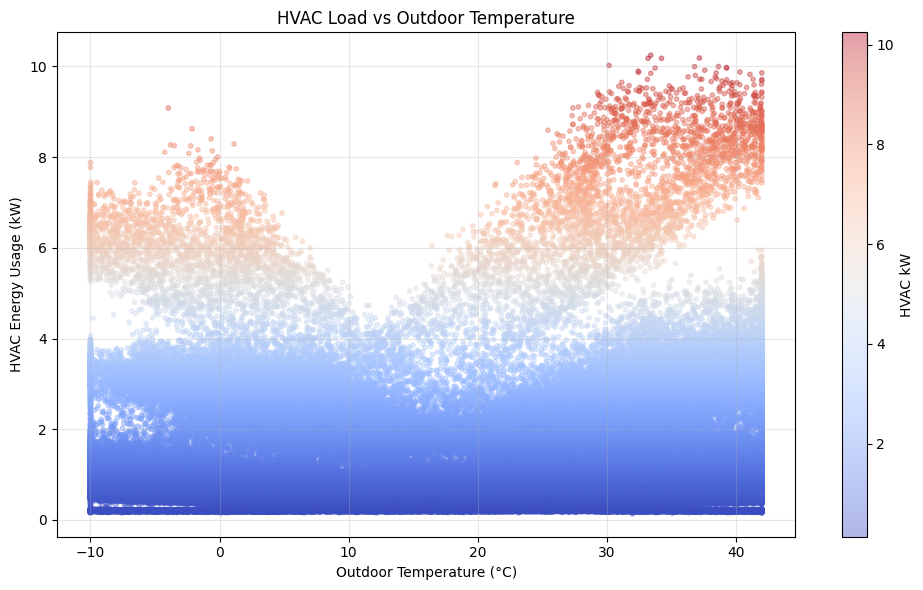

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['outdoor_temp_c'], data['hvac_kw'], alpha=0.4, s=10, c=data['hvac_kw'], cmap='coolwarm')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('HVAC Energy Usage (kW)')
plt.title('HVAC Load vs Outdoor Temperature')
plt.colorbar(label='HVAC kW')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 8. Holiday vs Regular Day

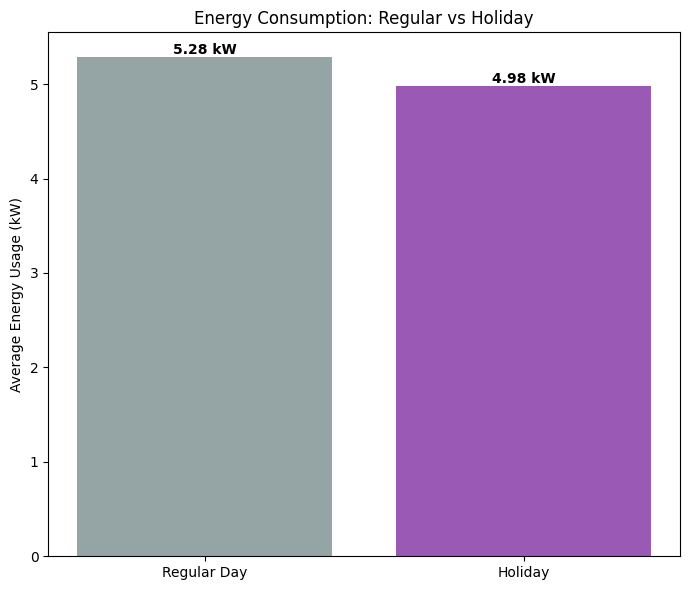

In [22]:
holiday_comparison = data.groupby('is_holiday')['use_kw'].mean()

plt.figure(figsize=(7, 6))
colors_hol = ['#95a5a6', '#9b59b6']
bars = plt.bar(['Regular Day', 'Holiday'], holiday_comparison.values, color=colors_hol)
plt.ylabel('Average Energy Usage (kW)')
plt.title('Energy Consumption: Regular vs Holiday')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f} kW', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 9. Correlation Heatmap

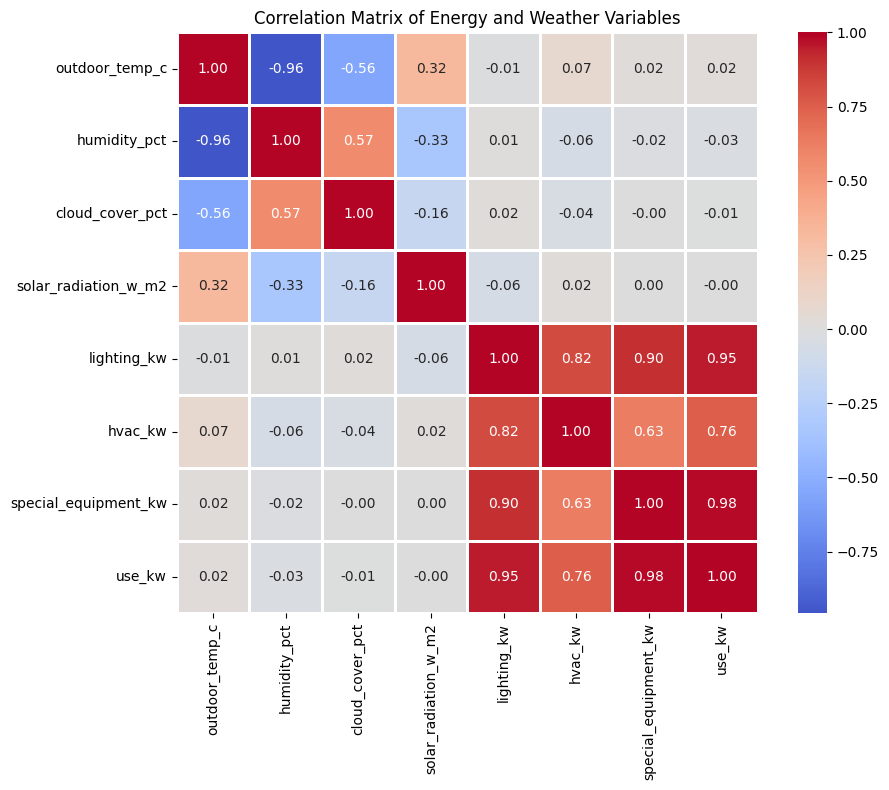

In [24]:
import seaborn as sns

# Select numeric columns for correlation
corr_cols = ['outdoor_temp_c', 'humidity_pct', 'cloud_cover_pct', 'solar_radiation_w_m2',
             'lighting_kw', 'hvac_kw', 'special_equipment_kw', 'use_kw']

correlation_matrix = data[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Correlation Matrix of Energy and Weather Variables')
plt.tight_layout()
plt.show()

### 10. Monthly Energy Trends

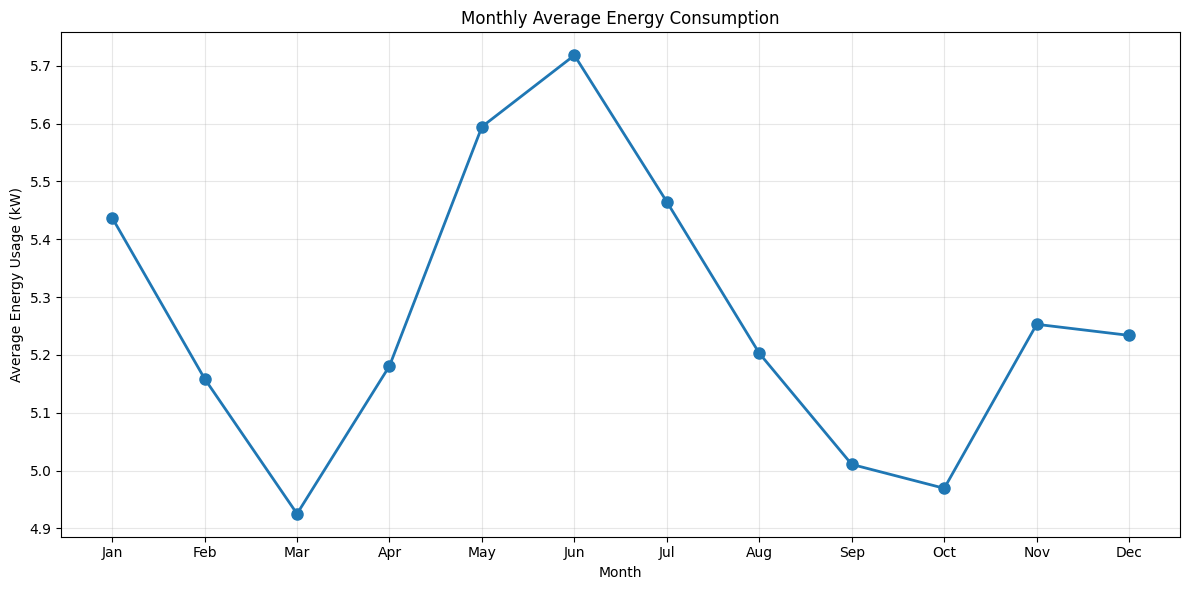

In [25]:
monthly_avg = data.groupby('month_num')['use_kw'].mean()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kW)')
plt.title('Monthly Average Energy Consumption')
plt.xticks(range(1, 13), month_names)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

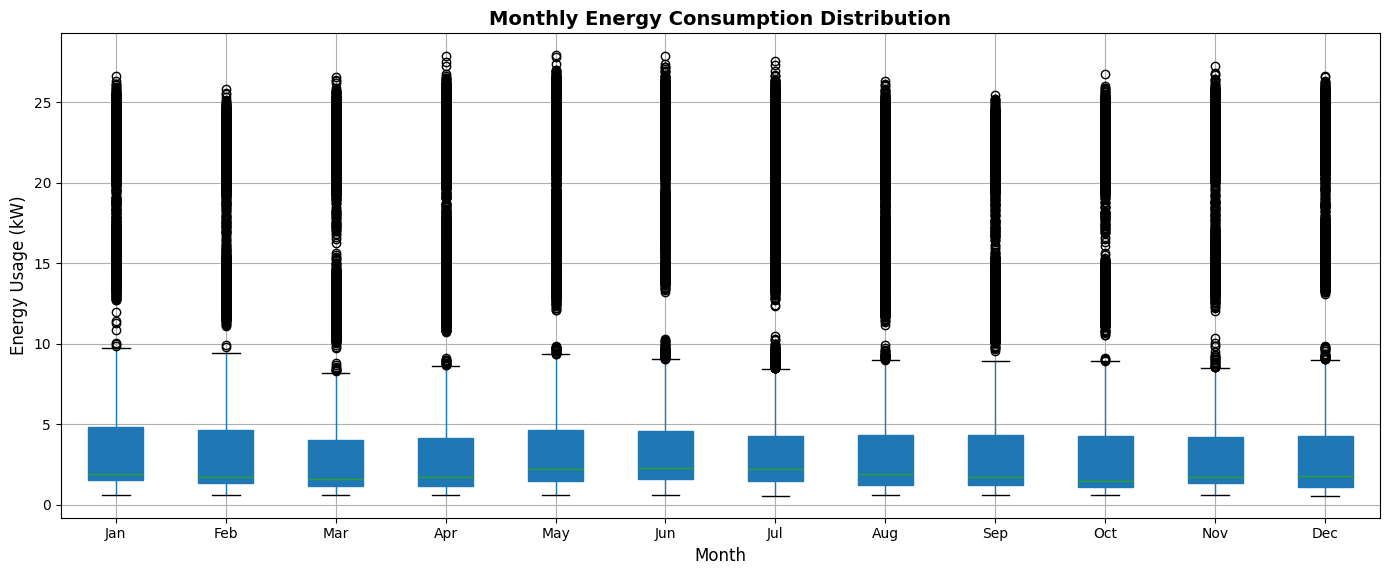

In [28]:
data['month'] = pd.to_datetime(data['time_ts']).dt.month
data['year_month'] = pd.to_datetime(data['time_ts']).dt.to_period('M')

plt.figure(figsize=(15, 6))
data.boxplot(column='use_kw', by='month', figsize=(14, 6), patch_artist=True)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy Usage (kW)', fontsize=12)
plt.title('Monthly Energy Consumption Distribution', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

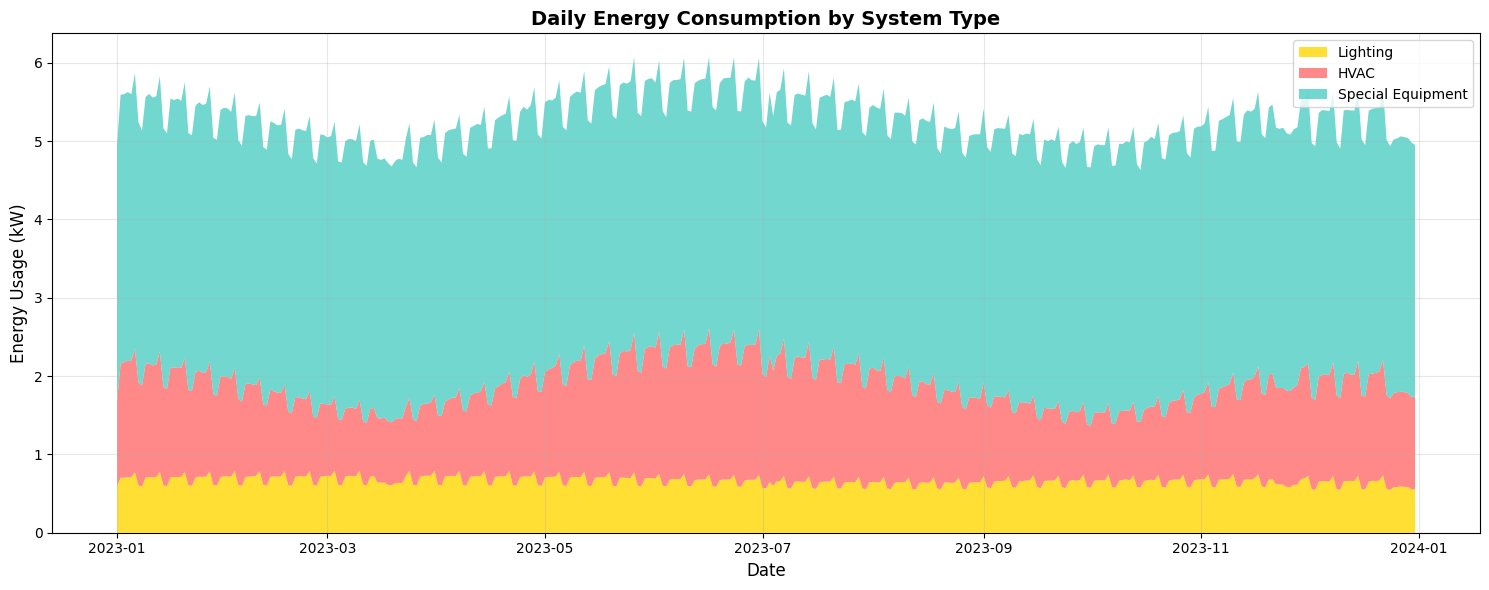

In [29]:
# Resample to daily for cleaner visualization
daily_lighting = df_plot['lighting_kw'].resample('D').mean()
daily_hvac = df_plot['hvac_kw'].resample('D').mean()
daily_equipment = df_plot['special_equipment_kw'].resample('D').mean()

plt.figure(figsize=(15, 6))
plt.stackplot(daily_lighting.index, 
              daily_lighting.values, 
              daily_hvac.values, 
              daily_equipment.values,
              labels=['Lighting', 'HVAC', 'Special Equipment'],
              colors=['#FFD700', '#FF6B6B', '#4ECDC4'],
              alpha=0.8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Usage (kW)', fontsize=12)
plt.title('Daily Energy Consumption by System Type', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

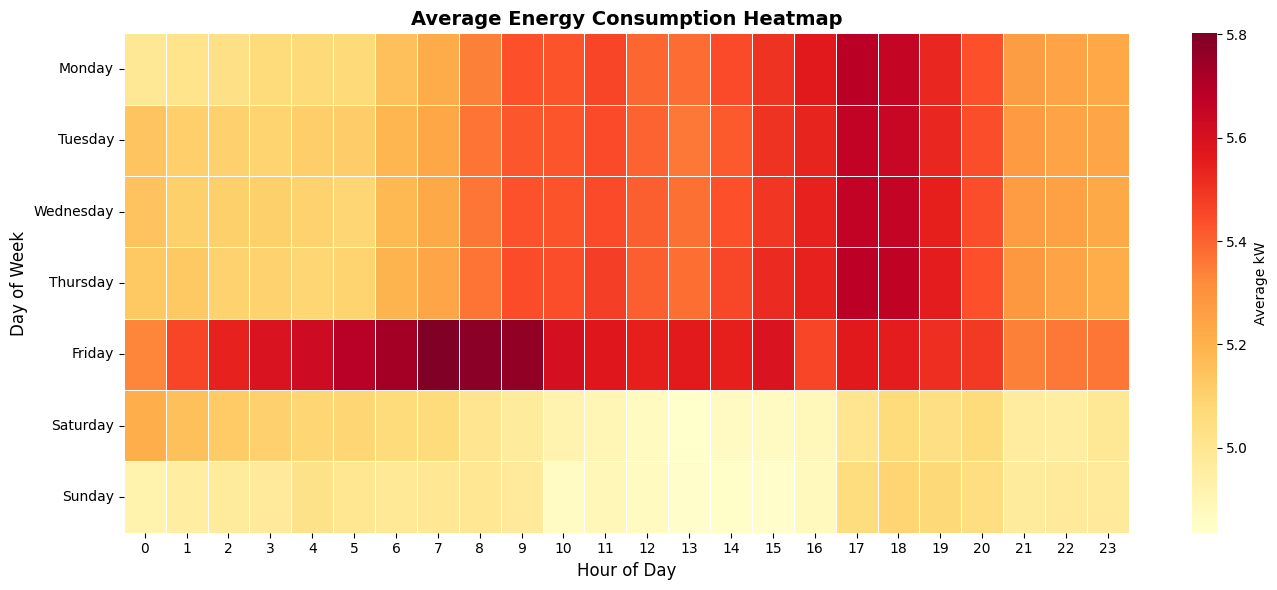

In [30]:
import numpy as np

# Create pivot table
data['hour'] = pd.to_datetime(data['time_ts']).dt.hour
data['day_name'] = pd.to_datetime(data['time_ts']).dt.day_name()

heatmap_data = data.pivot_table(values='use_kw', 
                                index='day_name', 
                                columns='hour', 
                                aggfunc='mean')

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(14, 6))
import seaborn as sns
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Average kW'}, 
            linewidths=0.5, annot=False)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.title('Average Energy Consumption Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()